In [1]:
# do_it_pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ch 2

In [4]:
# row - 행, 가로방향 데이터 - 개별데이터 (예 : 학생_김민수, 학생_박준호, 학생_이연아..)
# column - 열, 세로방향 데이터, feature - 개별데이터의 특성 (예: 이름, 나이, 키, 성적,번호..)

In [3]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [6]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [7]:
df.shape

(1704, 6)

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
# 칼럼선택 : df['칼럼명'], df[['칼럼1','칼럼2','칼럼3']]

In [11]:
df['lifeExp']  # df.lifeExp

0       28.801
1       30.332
2       31.997
3       34.020
4       36.088
         ...  
1699    62.351
1700    60.377
1701    46.809
1702    39.989
1703    43.487
Name: lifeExp, Length: 1704, dtype: float64

In [13]:
df[['lifeExp','year','pop']].head()

,lifeExp,year,pop
0,28.801,1952,8425333
1,30.332,1957,9240934
2,31.997,1962,10267083
3,34.020,1967,11537966
4,36.088,1972,13079460


In [15]:
df[['lifeExp','year','pop']].tail(3)

,lifeExp,year,pop
1701,46.809,1997,11404948
1702,39.989,2002,11926563
1703,43.487,2007,12311143


In [16]:
# row 선택

# df.iloc[row의 순번]
# df.loc['인덱스명']

In [18]:
df.iloc[2]

country      Afghanistan
continent           Asia
year                1962
lifeExp           31.997
pop             10267083
gdpPercap        853.101
Name: 2, dtype: object

In [20]:
df.loc[2]

country      Afghanistan
continent           Asia
year                1962
lifeExp           31.997
pop             10267083
gdpPercap        853.101
Name: 2, dtype: object

In [ ]:
# 0, 99, 999 번째 row를 출력

In [21]:
df.iloc[[0,99,999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


In [22]:
df.loc[[0,99,999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


In [23]:
# 행(row), 열(columns)을 함께 선택하는 경우

# df.iloc[행인덱스순번, 열인덱스순번]
# df.loc[행인덱스명, 칼럼명]

In [24]:
df.loc[100, ['year','lifeExp']]

year         1972
lifeExp    45.252
Name: 100, dtype: object

In [25]:
df.iloc[100, [2,3]]

year         1972
lifeExp    45.252
Name: 100, dtype: object

In [26]:
df.iloc[100, 2:4]

year         1972
lifeExp    45.252
Name: 100, dtype: object

In [27]:
df.iloc[[0,99,999], [0,3,5]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [28]:
df.loc[[0,99,999], ['country','lifeExp','gdpPercap']]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [29]:
# grouping

In [ ]:
# 연도별로 평균수명의 평균값을 출력...

In [31]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

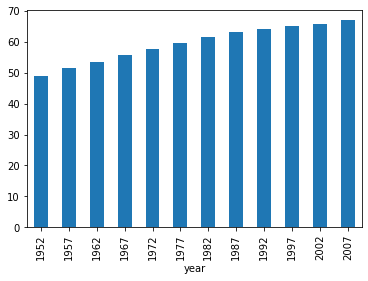

In [32]:
df.groupby('year')['lifeExp'].mean().plot(kind='bar')

In [33]:
grouped = df.groupby('year')
grouped['lifeExp'].agg(np.mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [ ]:
# 데이터를 연도, 지역별로 세분화해서 lifeExp, gdpPercap을 출력..
# => 데이터를 연도, 지역별로 세분화해서 묶는다
# => groupby

In [36]:
df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean().head(10)

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455

In [38]:
df.groupby(['year','continent'])[['lifeExp']].count()

lifeExp
year continent         
1952 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1957 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1962 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1967 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1972 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1977 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1982 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1987 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1992 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1997 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
2002 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
2007 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2

In [39]:
# ch 3

In [41]:
s = pd.Series(['banana', 42], index = ['fruit', 'number'])
s

fruit     banana
number        42
dtype: object

In [62]:
scientists = {
    'Name':['Rosaline Franklin','William Gosset'],
    'Occupation':['Chemist','Statician'],
    'Born':['1920-07-25', '1876-06-16'],
    'Died':['1958-04-16','1937-10-16'],
    'Age':[37, 61]
}

df = pd.DataFrame(scientists, index = ['A','B'])
df

,Name,Occupation,Born,Died,Age
A,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
B,William Gosset,Statician,1876-06-16,1937-10-16,61


In [63]:
df.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [64]:
df.index

Index(['A', 'B'], dtype='object')

In [65]:
df.set_index('Name', inplace=True)
df

,Occupation,Born,Died,Age
Name,,,,
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statician,1876-06-16,1937-10-16,61


In [66]:
df.drop('Age', axis=1, inplace=True)

In [67]:
df

,Occupation,Born,Died
Name,,,
Rosaline Franklin,Chemist,1920-07-25,1958-04-16
William Gosset,Statician,1876-06-16,1937-10-16


In [68]:
# 날짜 타입 데이터타입으로 변환

df['Born'] = pd.to_datetime(df['Born'])
df['Died'] = pd.to_datetime(df['Died'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Rosaline Franklin to William Gosset
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Occupation  2 non-null      object        
 1   Born        2 non-null      datetime64[ns]
 2   Died        2 non-null      datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 64.0+ bytes


In [70]:
df

,Occupation,Born,Died
Name,,,
Rosaline Franklin,Chemist,1920-07-25,1958-04-16
William Gosset,Statician,1876-06-16,1937-10-16


In [76]:
age = df['Died'].dt.year - df['Born'].dt.year
age 

Name
Rosaline Franklin    38
William Gosset       61
dtype: int64

In [77]:
df['Age'] = age
df

,Occupation,Born,Died,Age
Name,,,,
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,38
William Gosset,Statician,1876-06-16,1937-10-16,61


In [79]:
df['Age'].max()

61

In [80]:
df['Age'].min()

38

In [81]:
df['Age'].mean()

49.5

In [82]:
df['Age'].std()

16.263455967290593

In [85]:
df = pd.read_csv('./data/scientists.csv')
df

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


In [86]:
# 평균나이 보다 나이가 많은 사람의 데이터 출력..

In [90]:
df['Age'] > df['Age'].mean()

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool

In [89]:
df[df['Age'] > df['Age'].mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [ ]:
# broadcasting
# 데이터 간 shape이 다른 경우, shape의 확장을 통해 shape을 일치시킨다.
# 그 후 연산을 하면 동일한 index의 element끼리 연산을 하게 된다

In [92]:
type(df["Age"])

pandas.core.series.Series

In [94]:
df['Age']

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [93]:
df['Age'] + 10

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [96]:
# 나이가 많은 순으로 데이터를 정렬하시오..

df.sort_values('Age', ascending=False)

,Name,Born,Died,Age,Occupation
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist


In [101]:
# 평규나이 이상인 데이터만 출력..
df[df.Age > df.Age.mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [102]:
df.drop(1, axis=0)   # 원본반영 없음..

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [103]:
df

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [ ]:
# scients.csv 파일로 저장.

df.to_csv('scients.csv')

In [ ]:
df = pd.read_csv('scients.csv')

In [ ]:
# pickle로 저장

In [ ]:
df.to_pickle('scients.pickle')

In [ ]:
df = pd.read_pickle('scients.pickle')

In [ ]:
# tsv 파일로 저장

In [ ]:
df.to_csv('scients.tsv', sep='\t')

In [ ]:
df = read_csv('scients.tsv', sep='\t')

In [104]:
# ch 5 시각화

In [105]:
# ch 6 - concat, merge

In [106]:
df1 = pd.read_csv('./data/concat_1.csv')
df2 = pd.read_csv('./data/concat_2.csv')
df3 = pd.read_csv('./data/concat_3.csv')

In [107]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [108]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [109]:
df3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [110]:
# concat을 통해서 세 개의 dataframe을 세로방향과 가로방향으로 병합..

pd.concat([df1, df2, df3], axis=0)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [111]:
pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [112]:
# df1에 새로운 row : [a4, b4, c4, d4]를 추가..

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [127]:
s = pd.Series(['a4', 'b4', 'c4', 'd4'])
s

0    a4
1    b4
2    c4
3    d4
dtype: object

In [129]:
s = pd.DataFrame([s.tolist()], columns = ['A','B','C','D'])
s

,A,B,C,D
0,a4,b4,c4,d4


In [130]:
pd.concat([df1, s])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4


In [131]:
# ignore_index

In [134]:
pd.concat([df1, df2, df3], axis=0, ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [137]:
pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [139]:
pd.concat([df1, df2, df3], axis=1, ignore_index = True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [ ]:
# concat 시 columns명이나 index이름이 서로 다른 경우..

In [144]:
df2.columns = ['E','F','G','H']
df3.columns = ['A','C','F','H']

In [147]:
pd.concat([df1, df2, df3])

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [148]:
# 이름이 동일한 column만 concat..

In [149]:
pd.concat([df1, df2, df3], join='inner')

""
0
1
2
3
0
1
2
3
0
1


In [150]:
pd.concat([df2, df3], join='inner')

,F,H
0,b4,d4
1,b5,d5
2,b6,d6
3,b7,d7
0,c8,d8
1,c9,d9
2,c10,d10
3,c11,d11


In [151]:
pd.concat([df1, df3], join='inner')

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
0,a8,b8
1,a9,b9
2,a10,b10
3,a11,b11


In [152]:
# 인덱스가 서로 다른 df를 row방향으로 concat

In [153]:
df1.index = [0,1,2,3]
df2.index = [4,5,6,7]
df3.index = [0,2,5,7]

In [158]:
# 인덱스를 기준으로 동일한 인덱스에 concat된다..
# => 완전하게 concat을 하기 위해서는 index를 통일시켜야 한다..

pd.concat([df1,df2, df3], axis=1)

,A,B,C,D,E,F,G,H,A,C,F,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN,a9,b9,c9,d9
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5,a10,b10,c10,d10
6,NaN,NaN,NaN,NaN,a6,b6,c6,d6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7,a11,b11,c11,d11


In [160]:
pd.concat([df1, df3], axis=1, join='inner')

,A,B,C,D,A,C,F,H
0,a0,b0,c0,d0,a8,b8,c8,d8
2,a2,b2,c2,d2,a9,b9,c9,d9


In [161]:
pd.concat([df2, df3], axis=1, join='inner')

,E,F,G,H,A,C,F,H
5,a5,b5,c5,d5,a10,b10,c10,d10
7,a7,b7,c7,d7,a11,b11,c11,d11


In [163]:
### merge - 특정 칼럼값을 기준으로 merge..

In [166]:
person = pd.read_csv('./data/survey_person.csv')
site = pd.read_csv('./data/survey_site.csv')
survey = pd.read_csv('./data/survey_survey.csv')
visited = pd.read_csv('./data/survey_visited.csv')

In [170]:
person
site
survey
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [173]:
visited_subset = visited.loc[[0,2,6],:]

In [174]:
# visited_subset과 site를 merge

In [178]:
visited_subset

,ident,site,dated
0,619,DR-1,1927-02-08
2,734,DR-3,1939-01-07
6,837,MSK-4,1932-01-14


In [176]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [177]:
pd.merge(site,visited_subset, left_on = 'name', right_on = 'site')

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [179]:
# visited, site를 merge..

In [181]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [182]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [184]:
pd.merge(visited, site, left_on='site', right_on='name')

,ident,site,dated,name,lat,long
0,619,DR-1,1927-02-08,DR-1,-49.85,-128.57
1,622,DR-1,1927-02-10,DR-1,-49.85,-128.57
2,844,DR-1,1932-03-22,DR-1,-49.85,-128.57
3,734,DR-3,1939-01-07,DR-3,-47.15,-126.72
4,735,DR-3,1930-01-12,DR-3,-47.15,-126.72
5,751,DR-3,1930-02-26,DR-3,-47.15,-126.72
6,752,DR-3,NaN,DR-3,-47.15,-126.72
7,837,MSK-4,1932-01-14,MSK-4,-48.87,-123.40


In [185]:
# ch 6 - null

In [188]:
from numpy import NaN, NAN, nan

In [189]:
NaN == True

False

In [190]:
NaN == False

False

In [191]:
NaN == 0

False

In [192]:
NaN == ''

False

In [193]:
NaN == NaN

False

In [194]:
# pd.isnull() -  nan값 여부를 판별하는 함수..
#  pd.notnull() - nan이 아니면 True를 리턴하는 함수

pd.isnull(NaN)

True

In [195]:
pd.isnull(nan)

True

In [196]:
pd.isnull(NAN)

True

In [197]:
pd.notnull(NaN)

False

In [198]:
pd.notnull(42)

True

In [199]:
pd.notnull('python')

True

In [203]:
ebola = pd.read_csv('./data/country_timeseries.csv')
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [205]:
# column별 nan값의 갯수를 구하시..

In [207]:
ebola.isnull().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [208]:
ebola.count()

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64

In [210]:
ebola_subset = ebola.iloc[0:10, :5]
ebola_subset

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [ ]:
# fillna() : nan값을 다른 값으로 채운다..

In [211]:
ebola_subset.fillna(0)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,0.0,10030.0
1,1/4/2015,288,2775.0,0.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,0.0,8157.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,0.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,0.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [212]:
ebola_subset.fillna(method='ffill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2769.0,8157.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,8018.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7977.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [213]:
ebola_subset.fillna(method='bfill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,8166.0,10030.0
1,1/4/2015,288,2775.0,8166.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2730.0,8157.0,9633.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7977.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7862.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [214]:
# interpolate() - nan값의 앞뒤 값의 평균으로 채운다..

ebola_subset.interpolate()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2749.5,8157.0,9677.5
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7997.5,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7919.5,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [215]:
# dropna() - nan값이 포함된 column이나 row를 삭제

In [217]:
ebola.dropna()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [218]:
ebola.dropna(axis=1)

,Date,Day
0,1/5/2015,289
1,1/4/2015,288
2,1/3/2015,287
3,1/2/2015,286
4,12/31/2014,284
...,...,...
117,3/27/2014,5
118,3/26/2014,4
119,3/25/2014,3
120,3/24/2014,2


In [220]:
ebola.sum()

Date                   1/5/20151/4/20151/3/20151/2/201512/31/201412/2...
Day                                                                17663
Cases_Guinea                                                       84729
Cases_Liberia                                                     193833
Cases_SierraLeone                                                 211181
Cases_Nigeria                                                        636
Cases_Senegal                                                         27
Cases_UnitedStates                                                    59
Cases_Spain                                                           16
Cases_Mali                                                            42
Deaths_Guinea                                                      51818
Deaths_Liberia                                                     89198
Deaths_SierraLeone                                                 60352
Deaths_Nigeria                                     

In [221]:
ebola.sum(skipna=True)

Date                   1/5/20151/4/20151/3/20151/2/201512/31/201412/2...
Day                                                                17663
Cases_Guinea                                                       84729
Cases_Liberia                                                     193833
Cases_SierraLeone                                                 211181
Cases_Nigeria                                                        636
Cases_Senegal                                                         27
Cases_UnitedStates                                                    59
Cases_Spain                                                           16
Cases_Mali                                                            42
Deaths_Guinea                                                      51818
Deaths_Liberia                                                     89198
Deaths_SierraLeone                                                 60352
Deaths_Nigeria                                     

In [222]:
ebola.sum(skipna=False)

Date                   1/5/20151/4/20151/3/20151/2/201512/31/201412/2...
Day                                                                17663
Cases_Guinea                                                         NaN
Cases_Liberia                                                        NaN
Cases_SierraLeone                                                    NaN
Cases_Nigeria                                                        NaN
Cases_Senegal                                                        NaN
Cases_UnitedStates                                                   NaN
Cases_Spain                                                          NaN
Cases_Mali                                                           NaN
Deaths_Guinea                                                        NaN
Deaths_Liberia                                                       NaN
Deaths_SierraLeone                                                   NaN
Deaths_Nigeria                                     

In [223]:
# ch 7

In [228]:
pew = pd.read_csv('./data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [226]:
pew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [ ]:
# melt : column을 row로 바꾸는 함수..
#       여러 column들을 하나의 칼럼의 값으로 전환..

In [230]:
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [229]:
# id_vars : 고정할 칼럼.. row의 값으로 전환되지 않을 칼럼..

pew_long = pd.melt(pew, id_vars= 'religion')
pew_long

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [ ]:
# var_name : 새로운 칼럼명이 들어갈 칼럼의 이름
#  value_name : 새로운 값이 들어갈 칼럼의 이름

In [231]:
pew_long = pd.melt(pew, id_vars='religion', var_name='income', value_name='count')
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [234]:
billboard = pd.read_csv('./data/billboard.csv')
billboard.head(3)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
billboard_long = pd.melt(billboard, \
   id_vars=['year','artist','track','time','date.entered'],\
                         var_name='week', value_name='rating')

In [236]:
billboard_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [237]:
# column 나누기
# : column이 두 개의 서로다른 의미가 합쳐져서 하나의 칼럼을 이룬경우..

In [239]:
ebola = pd.read_csv('./data/country_timeseries.csv')

In [240]:
ebola_long = pd.melt(ebola, id_vars=['Date', 'Day'])
ebola_long.head()

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [241]:
variable_split = ebola_long.variable.str.split('_')

In [243]:
variable_split.str.get(0)

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [244]:
variable_split.str.get(1)

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [245]:
ebola_long['status'] = variable_split.str.get(0)
ebola_long['country'] = variable_split.str.get(1)

In [247]:
ebola_long.head()

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


In [249]:
temp1 = []
temp2 = []
for v in ebola_long['variable']:
    temp1.append(v.split('_')[0])
    temp2.append(v.split('_')[1])

In [251]:
ebola_long['status'] = variable_split.str.get(0)
ebola_long['country'] = variable_split.str.get(1)

['Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',
 'Guinea',

In [ ]:
# ch 7 - datatype

In [1]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips')

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
# column의 datatype을 바꾸기..
# => df['columns'].astype('datatype')
# => pd.to_numeric(df['columns'])

In [7]:
tips['sex_str'] = tips['sex'].astype('str')
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [9]:
tips['total_bill'] = tips['total_bill'].astype('str')

In [10]:
tips.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [12]:
tips_sub_miss = tips.head(10)
tips_sub_miss

,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,10.34,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,23.68,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
5,25.29,4.71,Male,No,Sun,Dinner,4,Male
6,8.77,2.00,Male,No,Sun,Dinner,2,Male
7,26.88,3.12,Male,No,Sun,Dinner,4,Male
8,15.04,1.96,Male,No,Sun,Dinner,2,Male
9,14.78,3.23,Male,No,Sun,Dinner,2,Male


In [13]:
tips_sub_miss.loc[[1,3,5,7], 'total_bill'] = 'missing'
tips_sub_miss

C:\Users\TJ\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,missing,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,missing,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
5,missing,4.71,Male,No,Sun,Dinner,4,Male
6,8.77,2.00,Male,No,Sun,Dinner,2,Male
7,missing,3.12,Male,No,Sun,Dinner,4,Male
8,15.04,1.96,Male,No,Sun,Dinner,2,Male
9,14.78,3.23,Male,No,Sun,Dinner,2,Male


In [14]:
tips_sub_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  10 non-null     object  
 1   tip         10 non-null     float64 
 2   sex         10 non-null     category
 3   smoker      10 non-null     category
 4   day         10 non-null     category
 5   time        10 non-null     category
 6   size        10 non-null     int64   
 7   sex_str     10 non-null     object  
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 968.0+ bytes


In [16]:
tips_sub_miss.head()

,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,missing,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,missing,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female


In [15]:
tips_sub_miss['total_bill'].astype(float)

ValueError: could not convert string to float: 'missing'

In [ ]:
# pd.to_numeric()

In [17]:
pd.to_numeric(tips_sub_miss['total_bill'])

ValueError: Unable to parse string "missing" at position 1

In [18]:
# errors='ignore' : 에러 발생 시 데이터타입 변환을 하지 마라..

pd.to_numeric(tips_sub_miss['total_bill'], errors='ignore')

0      16.99
1    missing
2      21.01
3    missing
4      24.59
5    missing
6       8.77
7    missing
8      15.04
9      14.78
Name: total_bill, dtype: object

In [19]:
# errors='raise' : 에러 발생 시 에러 발생....

pd.to_numeric(tips_sub_miss['total_bill'], errors='raise')

ValueError: Unable to parse string "missing" at position 1

In [20]:
# errors='coerce' : 에러 발생 시 nan으로 처리......

pd.to_numeric(tips_sub_miss['total_bill'], errors='coerce')

0    16.99
1      NaN
2    21.01
3      NaN
4    24.59
5      NaN
6     8.77
7      NaN
8    15.04
9    14.78
Name: total_bill, dtype: float64

In [21]:
tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], \
                                            errors='coerce')

<ipython-input-21-7c604492da7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], \


In [22]:
tips_sub_miss.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [23]:
# category
# 데이터의 종류가 한정된 경우.. str type보다 메모리나 속도가 빠르다.
# sex : 'male', 'female'

In [24]:
tips.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [25]:
tips['sex'] = tips['sex'].astype('str')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    object  
 1   tip         244 non-null    float64 
 2   sex         244 non-null    object  
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
dtypes: category(3), float64(1), int64(1), object(3)
memory usage: 10.7+ KB


In [26]:
tips['sex'] = tips['sex'].astype('category')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    object  
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 9.2+ KB


In [27]:
# ch 09

In [28]:
word = 'grail'
sent = 'a scratch'

In [29]:
word[0]

'g'

In [30]:
word[0:3]

'gra'

In [31]:
sent[-1]

'h'

In [32]:
sent[-9:-8]

'a'

In [33]:
word[0:3]

'gra'

In [34]:
word[:3]

'gra'

In [35]:
word[2:]

'ail'

In [36]:
sent[:]

'a scratch'

In [37]:
sent[::2]

'asrth'

In [38]:
# join, splitlines, replace

In [39]:
# 1. join - list의 원소를 이어서 문자열로 리턴한다..

In [42]:
d1 = '40'
m1 = '46"'
s1 = '52.837"'
u1 = 'N'
L = [d1, m1, s1, u1]

In [43]:
' '.join(L)

'40 46" 52.837" N'

In [44]:
'-'.join(L)

'40-46"-52.837"-N'

In [45]:
'::'.join(L)

'40::46"::52.837"::N'

In [ ]:
# 2. splitlines() - 문자열을 줄바꿈으로 나누는 메서드..

In [57]:
multi_str = '''
Guard: What? Ridden on a house?
King Arthur: Yes!
Guard: You're using coconuts!
King Arthur: What?
Guard: You've got... coconut[s] and you're bangin' 'em together.
'''
print(multi_str)


Guard: What? Ridden on a house?
King Arthur: Yes!
Guard: You're using coconuts!
King Arthur: What?
Guard: You've got... coconut[s] and you're bangin' 'em together.



In [50]:
multi_str_splitlines = multi_str.splitlines()
multi_str_splitlines

['',
 'Guard: What? Ridden on a house?',
 'King Arthur: Yes!',
 "Guard: You're using coconuts!",
 'King Arthur: What?',
 "Guard: You've got... coconut[s] and you're bangin' 'em together."]

In [51]:
multi_str_splitlines[1: 10: 2]

['Guard: What? Ridden on a house?',
 "Guard: You're using coconuts!",
 "Guard: You've got... coconut[s] and you're bangin' 'em together."]

In [52]:
# 3. replace -  문자열의 요소를 다른 요소로 바꾼다

In [58]:
print(multi_str.replace('Guard:',''))


 What? Ridden on a house?
King Arthur: Yes!
 You're using coconuts!
King Arthur: What?
 You've got... coconut[s] and you're bangin' 'em together.



In [59]:
print(multi_str.replace('coconut', 'apple'))


Guard: What? Ridden on a house?
King Arthur: Yes!
Guard: You're using apples!
King Arthur: What?
Guard: You've got... apple[s] and you're bangin' 'em together.



In [60]:
# format()

In [61]:
'some digits of pi: {}'.format(3.14)

'some digits of pi: 3.14'

In [62]:
'some digits of pi: {:,}'.format(35000)

'some digits of pi: 35,000'

In [63]:
'some digits of pi: {0:.4%}'.format(35000)

'some digits of pi: 3500000.0000%'

In [64]:
# python 3.6 새로운 방식 - f-string방식

In [65]:
var = 'flesh wound'
s = f"It's just a {var}!"
print(s)

It's just a flesh wound!


In [66]:
var = 'fake'
s = f"It's just a {var}!"
print(s)

It's just a fake!


In [ ]:
# 정규표현식 - regular expression

In [67]:
import re

In [68]:
tele_num = '1234567890'
tele_num1 = 'hello python 2154125478 programming'

In [73]:
m = re.match(pattern = '\d\d\d\d\d\d\d\d\d\d', string=tele_num)

In [74]:
print(m)

<re.Match object; span=(0, 10), match='1234567890'>


In [71]:
# m = re.match(pattern = '\d\d\d\d\d\d\d\d\d\d', string=tele_num1)

In [75]:
# print(m)

In [76]:
print(m.start())

0


In [77]:
print(m.end())

10


In [78]:
print(m.span())

(0, 10)


In [79]:
print(m.group())

1234567890


In [80]:
tele_num_spaces = '123 456 7890'

In [81]:
m = re.match(pattern = '\d{10}', string = tele_num_spaces)
print(m)

None


In [82]:
p = '\d{3}\s?\d{3}\s?\d{4}'
m = re.match(pattern = p, string = tele_num_spaces)
print(m)

<re.Match object; span=(0, 12), match='123 456 7890'>


In [83]:
tele_num1 = '(123) 456-7995'
p = '\(?\d{3}\)?\s?\d{3}\-?\d{4}'
m = re.match(pattern = p, string = tele_num1)
print(m)

<re.Match object; span=(0, 14), match='(123) 456-7995'>


In [84]:
p = re.compile(p)
m = p.match(tele_num1)
print(m)

<re.Match object; span=(0, 14), match='(123) 456-7995'>


In [85]:
# ch 10

In [86]:
def my_sq(x):
    return x**2

In [89]:
def my_exp(x, n):
    return x**n

In [90]:
my_sq(4)

16

In [91]:
my_exp(4,2)

16

In [92]:
df = pd.DataFrame({'a':[10,20,30], 'b':[20,30,40]})
df

,a,b
0,10,20
1,20,30
2,30,40


In [93]:
df['a'].apply(my_sq)

0    100
1    400
2    900
Name: a, dtype: int64

In [97]:
# 매개변수가 2개 필요한 함수를 apply적용시, apply에 매개변수 하나를
# 더 넘긴다

df['b'].apply(my_exp, n=2)

0     400
1     900
2    1600
Name: b, dtype: int64

In [ ]:
# 이전 내용은 특정 column에 apply를 적용하는 경우
# 아래는 dataframe에 apply() 적용하는 경우..

In [98]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [99]:
def print_me(x):
    print(x)

In [100]:
df.apply(print_me)

0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


a    None
b    None
dtype: object

In [101]:
df.apply(sum)

a    60
b    90
dtype: int64

In [102]:
df.apply(sum, axis=1)

0    30
1    50
2    70
dtype: int64

In [103]:
def avg_3(x,y,z):
    return (x+y+z)/3

In [104]:
df.apply(avg_3)  # 칼럼이 데이터별로 입력, 칼럼 전체가 하나로..

TypeError: avg_3() missing 2 required positional arguments: 'y' and 'z'

In [105]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [108]:
def avg_3(x):
    suma = 0
    for i in x:
        suma+=i
    return suma/len(x)

In [109]:
df.apply(avg_3)

a    20.0
b    30.0
dtype: float64

In [111]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [112]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [115]:
# vector에서 null값의 갯수를 리턴..
import numpy as np
def count_missing(vec):
    null_vec = pd.isnull(vec)
    null_count = np.sum(null_vec)
    return null_count

In [116]:
cmis_col = titanic.apply(count_missing)
print(cmis_col)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [117]:
def prop_missing(vec):
    num = count_missing(vec)
    dem = vec.size
    return num/dem

In [118]:
titanic.apply(prop_missing)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [119]:
def prop_complete(vec):
    return 1-prop_missing(vec)

In [120]:
titanic.apply(prop_complete)

survived       1.000000
pclass         1.000000
sex            1.000000
age            0.801347
sibsp          1.000000
parch          1.000000
fare           1.000000
embarked       0.997755
class          1.000000
who            1.000000
adult_male     1.000000
deck           0.227834
embark_town    0.997755
alive          1.000000
alone          1.000000
dtype: float64

In [121]:
# row에 apply를 통해서 함수를 적용

In [122]:
titanic.apply(count_missing, axis=1)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

In [124]:
titanic.apply(prop_missing, axis=1)

0      0.066667
1      0.000000
2      0.066667
3      0.000000
4      0.066667
         ...   
886    0.066667
887    0.000000
888    0.133333
889    0.000000
890    0.066667
Length: 891, dtype: float64

In [125]:
titanic.apply(prop_complete, axis=1)

0      0.933333
1      1.000000
2      0.933333
3      1.000000
4      0.933333
         ...   
886    0.933333
887    1.000000
888    0.866667
889    1.000000
890    0.933333
Length: 891, dtype: float64

In [128]:
titanic[titanic.apply(prop_complete, axis=1) > 0.9]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# ch 11

In [129]:
# groupby - 동일한 종류의 데이터끼리 묶는 함수

In [131]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [132]:
# 연도별 평균수면의 변화..

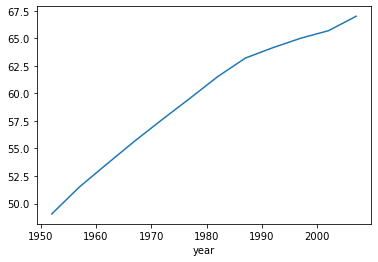

In [134]:
df.groupby('year')['lifeExp'].mean().plot()

In [135]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [136]:
# 평균을 리턴하는 함수

def my_mean(values):
    n = len(values)
    
    suma = 0
    for value in values:
        suma += value
    return suma/n

In [137]:
df.groupby('year').lifeExp.agg(my_mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [142]:
def my_mean_diff(values, diff_value):
    n = len(values)
    suma = 0
    
    for value in values:
        suma+=value
    mean = suma/n
    return mean - diff_value

In [143]:
global_mean = df.lifeExp.mean()
global_mean

59.47443936619713

In [144]:
# 연도별 평균 수명과의 차를 계산
# agg : 그룹별로 함수의 결과값을 집계..

df.groupby('year').lifeExp.agg(my_mean_diff, diff_value=global_mean)

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64

In [146]:
df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std])

,count_nonzero,mean,std
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953
1977,142.0,59.570157,11.227229
1982,142.0,61.533197,10.770618
1987,142.0,63.212613,10.556285
1992,142.0,64.160338,11.227380


In [150]:
df.groupby('year').agg({'lifeExp':'mean', 'pop':'median', \
                        'gdpPercap':'median'})

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,3943953.0,1968.528344
1957,51.507401,4282942.0,2173.220291
1962,53.609249,4686039.5,2335.439533
1967,55.678290,5170175.5,2678.334741
1972,57.647386,5877996.5,3339.129407
1977,59.570157,6404036.5,3798.609244
1982,61.533197,7007320.0,4216.228428
1987,63.212613,7774861.5,4280.300366
1992,64.160338,8688686.5,4386.085502


In [151]:
# transform() - 그룹별로 데이터의 값을 변경..

In [158]:
# 데이터를 정규화하는 함수..

def my_zscore(x):
    return (x - x.mean())/ x.std() 

In [163]:
# 데이터를 그룹별로 정규화..

df.groupby('year').lifeExp.transform(my_zscore)

1699   -0.081621
1700   -0.336974
1701   -1.574962
1702   -2.093346
1703   -1.948180
Name: lifeExp, dtype: float64

In [174]:
np.random.seed(42)
tips10 = sns.load_dataset('tips').sample(10)
tips10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [175]:
tips10.loc[np.random.permutation(tips10.index)[:4], 'total_bill']=np.NaN
tips10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [176]:
tips10.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,4,7,7,7,7,7
Female,2,3,3,3,3,3


In [177]:
tips10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [181]:
# bill_mean = tips10.total_bill.mean(skipna=True)
# tips10.fillna(bill_mean)

16.611666666666668

In [182]:
def fill_na_mean(x):
    avg = x.mean()
    return x.fillna(avg)

In [184]:
total_bill_mean = tips10.groupby('sex').total_bill.\
apply(fill_na_mean)

tips10['total_bill_mean1'] = total_bill_mean
tips10

,total_bill,tip,sex,smoker,day,time,size,total_bill_mean,total_bill_mean1
24,19.82,3.18,Male,No,Sat,Dinner,2,19.8200,19.8200
6,8.77,2.00,Male,No,Sun,Dinner,2,8.7700,8.7700
153,NaN,2.00,Male,No,Sun,Dinner,4,17.9525,17.9525
211,NaN,5.16,Male,Yes,Sat,Dinner,4,17.9525,17.9525
198,NaN,2.00,Female,Yes,Thur,Lunch,2,13.9300,13.9300
176,NaN,2.00,Male,Yes,Sun,Dinner,2,17.9525,17.9525
192,28.44,2.56,Male,Yes,Thur,Lunch,2,28.4400,28.4400
124,12.48,2.52,Female,No,Thur,Lunch,2,12.4800,12.4800
9,14.78,3.23,Male,No,Sun,Dinner,2,14.7800,14.7800
101,15.38,3.00,Female,Yes,Fri,Dinner,2,15.3800,15.3800


In [185]:
# filter() - True인 값만 남긴다..

In [186]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [187]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [194]:
# tips.size

In [195]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [197]:
tips_filter = tips.groupby('size').filter(lambda x:x['size'].count() >= 30)
tips_filter

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [198]:
tips_filter['size'].value_counts()

2    156
3     38
4     37
Name: size, dtype: int64

In [199]:
# df.groupby('col').agg(func) - 그룹별 집계값
# df.groupby('col').transform(func) - 그룹별 개별데이터 값을 변경
# df.groupby('col').filter(func) - True에 해당되는 그룹데이터만 남김

In [200]:
# 참조

In [201]:
data = {'Team':['Riders','Riders','Devils', 'Devils','Kings','Giant', 'Kings',\
               'Kings','Riders','Royals','Royals', 'Riders'],
       'Rank':[1,2,2,3,3,4,1,1,2,4,1,2],
       'Year':[2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
       'Points':[876,788,863,673,741,812,756,788,694,701,804,690]}

In [203]:
df = pd.DataFrame(data)

In [204]:
grouped = df.groupby('Team')

In [205]:
grouped.agg(min)

,Rank,Year,Points
Team,,,
Devils,2,2014,673
Giant,4,2015,812
Kings,1,2014,741
Riders,1,2014,690
Royals,1,2014,701


In [206]:
grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Giant,4.000000,2015.000000,812.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.000000
Royals,2.500000,2014.500000,752.500000


In [207]:
grouped['Points'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Team,,,
Devils,1536,768.000000,134.350288
Giant,812,812.000000,NaN
Kings,2285,761.666667,24.006943
Riders,3048,762.000000,88.468450
Royals,1505,752.500000,72.831998


In [212]:
trans_rank = grouped.Rank.transform(min)

In [214]:
df['trans_rank'] = trans_rank

In [215]:
df

,Team,Rank,Year,Points,trans_rank
0,Riders,1,2014,876,1
1,Riders,2,2015,788,1
2,Devils,2,2014,863,2
3,Devils,3,2015,673,2
4,Kings,3,2014,741,1
5,Giant,4,2015,812,4
6,Kings,1,2016,756,1
7,Kings,1,2017,788,1
8,Riders,2,2016,694,1
9,Royals,4,2014,701,1


In [216]:
df.groupby('Team')['Rank'].count()

Team
Devils    2
Giant     1
Kings     3
Riders    4
Royals    2
Name: Rank, dtype: int64

In [217]:
df.groupby('Team').filter(lambda x: len(x) > 2)

,Team,Rank,Year,Points,trans_rank
0,Riders,1,2014,876,1
1,Riders,2,2015,788,1
4,Kings,3,2014,741,1
6,Kings,1,2016,756,1
7,Kings,1,2017,788,1
8,Riders,2,2016,694,1
11,Riders,2,2017,690,1


In [218]:
# groupby 객체

In [220]:
tips10 = sns.load_dataset('tips').sample(10)
tips10

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.00,Female,No,Thur,Dinner,2
58,11.24,1.76,Male,Yes,Sat,Dinner,2
227,20.45,3.00,Male,No,Sat,Dinner,4
137,14.15,2.00,Female,No,Thur,Lunch,2
173,31.85,3.18,Male,Yes,Sun,Dinner,2
77,27.20,4.00,Male,No,Thur,Lunch,4
192,28.44,2.56,Male,Yes,Thur,Lunch,2
213,13.27,2.50,Female,Yes,Sat,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
231,15.69,3.00,Male,Yes,Sat,Dinner,3


In [221]:
grouped = tips10.groupby('sex')

In [223]:
grouped.agg(np.mean)

,total_bill,tip,size
sex,,,
Male,20.734286,2.744286,2.714286
Female,15.400000,2.500000,2.000000


In [226]:
grouped.agg(len)

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,7.0,7.0,7,7,7,7
Female,3.0,3.0,3,3,3,3


In [227]:
grouped.get_group('Male')

,total_bill,tip,sex,smoker,day,time,size
58,11.24,1.76,Male,Yes,Sat,Dinner,2
227,20.45,3.00,Male,No,Sat,Dinner,4
173,31.85,3.18,Male,Yes,Sun,Dinner,2
77,27.20,4.00,Male,No,Thur,Lunch,4
192,28.44,2.56,Male,Yes,Thur,Lunch,2
10,10.27,1.71,Male,No,Sun,Dinner,2
231,15.69,3.00,Male,Yes,Sat,Dinner,3


In [228]:
grouped.get_group('Female')

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.0,Female,No,Thur,Dinner,2
137,14.15,2.0,Female,No,Thur,Lunch,2
213,13.27,2.5,Female,Yes,Sat,Dinner,2


In [229]:
for g in grouped:
    print(g)

('Male',      total_bill   tip   sex smoker   day    time  size
58        11.24  1.76  Male    Yes   Sat  Dinner     2
227       20.45  3.00  Male     No   Sat  Dinner     4
173       31.85  3.18  Male    Yes   Sun  Dinner     2
77        27.20  4.00  Male     No  Thur   Lunch     4
192       28.44  2.56  Male    Yes  Thur   Lunch     2
10        10.27  1.71  Male     No   Sun  Dinner     2
231       15.69  3.00  Male    Yes   Sat  Dinner     3)
('Female',      total_bill  tip     sex smoker   day    time  size
243       18.78  3.0  Female     No  Thur  Dinner     2
137       14.15  2.0  Female     No  Thur   Lunch     2
213       13.27  2.5  Female    Yes   Sat  Dinner     2)


In [230]:
# multi groupby

In [232]:
multi_grouped = tips10.groupby(['sex','time'])

In [238]:
group_avg = multi_grouped.agg(np.mean)
group_avg

total_bill   tip  size
sex    time                          
Male   Lunch       27.820  3.28   3.0
       Dinner      17.900  2.53   2.6
Female Lunch       14.150  2.00   2.0
       Dinner      16.025  2.75   2.0

In [236]:
group_avg.columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [239]:
group_avg.index

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])

In [241]:
group_avg.reset_index()

,sex,time,total_bill,tip,size
0,Male,Lunch,27.820,3.28,3.0
1,Male,Dinner,17.900,2.53,2.6
2,Female,Lunch,14.150,2.00,2.0
3,Female,Dinner,16.025,2.75,2.0


In [242]:
tips10.groupby(['sex','time'], as_index=False).mean()

,sex,time,total_bill,tip,size
0,Male,Lunch,27.820,3.28,3.0
1,Male,Dinner,17.900,2.53,2.6
2,Female,Lunch,14.150,2.00,2.0
3,Female,Dinner,16.025,2.75,2.0


In [1]:
# ch 12 - datetime

In [7]:
from datetime import datetime
# import datetime

In [10]:
now1 = datetime.now()
print(now1)

2020-10-29 11:12:42.272685


In [11]:
now1 = datetime.today()
print(now1)

2020-10-29 11:12:53.327698


In [14]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

In [15]:
print(t1)
print(t2)
print(t3)

2020-10-29 11:14:44.839158
1970-01-01 00:00:00
1970-12-12 13:24:34


In [17]:
diff2 = t2- t1
print(diff2)

-18565 days, 12:45:15.160842


In [19]:
dt = datetime.now()
dt

datetime.datetime(2020, 10, 29, 11, 16, 30, 783504)

In [20]:
dt.year

2020

In [21]:
dt.month

10

In [22]:
print(dt.day, dt.hour, dt.minute, dt.second)

29 11 16 30


In [24]:
dt.weekday()  # 월: 0, 화 : 1, 수:2, 목:3, 금:4, 토:5, 일:6

3

In [25]:
dt.strftime('%A %d %B %Y')

'Thursday 29 October 2020'

In [26]:
datetime.strptime('2017-01-02 14:44', '%Y-%m-%d %H:%M')

datetime.datetime(2017, 1, 2, 14, 44)

In [27]:
from dateutil.parser import parse

In [28]:
parse('2016-04-16')

datetime.datetime(2016, 4, 16, 0, 0)

In [29]:
parse("Apr 10, 2016 04:05:31 PM")

datetime.datetime(2016, 4, 10, 16, 5, 31)

In [30]:
parse('6/7/2016')

datetime.datetime(2016, 6, 7, 0, 0)

In [31]:
# timedelta

In [33]:
dt1 = datetime(2016, 2, 19, 14)
dt2 = datetime(2016, 1, 2, 13)
td = dt1-dt2

In [34]:
td.days

48

In [35]:
td.seconds

3600

In [37]:
td.microseconds

0

In [38]:
td.total_seconds()

4150800.0

In [39]:
t2 = datetime(2018,9,1,13)
t2

datetime.datetime(2018, 9, 1, 13, 0)

In [42]:
import datetime
dt = datetime.timedelta(days=90, seconds=3600)

In [43]:
t2 + dt

datetime.datetime(2018, 11, 30, 14, 0)

In [44]:
t2 - dt

datetime.datetime(2018, 6, 3, 12, 0)

In [45]:
pwd

'D:\\BigData\\numpy_pandas\\do_it_pandas'

In [47]:
import pandas as pd

df = pd.read_csv('./data/country_timeseries.csv')
df.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [50]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [54]:
df['Date'].iloc[3].year

2015

In [55]:
df['Date'].iloc[3].day

2

In [57]:
df['Date'].iloc[3].quarter

1

In [58]:
df['Date'].dt.year

0      2015
1      2015
2      2015
3      2015
4      2014
       ... 
117    2014
118    2014
119    2014
120    2014
121    2014
Name: Date, Length: 122, dtype: int64

In [59]:
df['Date'].dt.day

0       5
1       4
2       3
3       2
4      31
       ..
117    27
118    26
119    25
120    24
121    22
Name: Date, Length: 122, dtype: int64

In [63]:
df['year'] = df['Date'].dt.year
df.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014


In [64]:
df['month'], df['day'] = df['Date'].dt.month, df['Date'].dt.day

In [65]:
df.head(3)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015,1,5
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015,1,4
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015,1,3


In [67]:
df.Date.min()

Timestamp('2014-03-22 00:00:00')

In [68]:
df.Date.max()

Timestamp('2015-01-05 00:00:00')

In [69]:
# 각 row별로 날짜 데이터에서 최초 발생일부터 경과날짜를 새로운 칼럼
# df['outbreak_d']

In [72]:
df['outbreak_d'] = df['Date'] - df['Date'].min()

In [74]:
df.head(2)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day,outbreak_d
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,2977.0,NaN,NaN,NaN,NaN,NaN,2015,1,5,289 days
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,2943.0,NaN,NaN,NaN,NaN,NaN,2015,1,4,288 days


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    datetime64[ns] 
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

In [76]:
# 국가별 ebola 확산 속도를 비교.. Line Chart

In [91]:
df.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day,outbreak_d
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,2977.0,NaN,NaN,NaN,NaN,NaN,2015,1,5,289 days
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,2943.0,NaN,NaN,NaN,NaN,NaN,2015,1,4,288 days
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,2915.0,NaN,NaN,NaN,NaN,NaN,2015,1,3,287 days
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,2,286 days
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,...,2827.0,NaN,NaN,NaN,NaN,NaN,2014,12,31,284 days


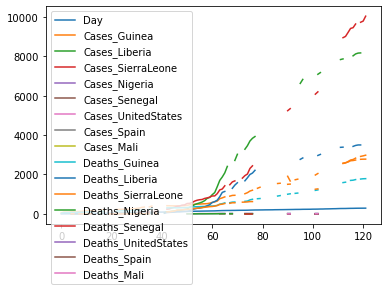

In [94]:
df.sort_values('Date').reset_index().iloc[:, 2:-4].plot()

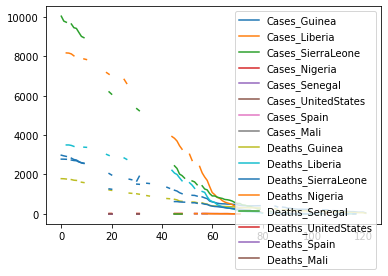

In [81]:
df.iloc[:, 2:-4].plot()

In [109]:
ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates=['Date'])

In [98]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [110]:
ebola.index = ebola['Date']

In [100]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [111]:
new_id = pd.date_range(ebola.index.min(), ebola.index.max())
new_id

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')

In [112]:
new_id = reversed(new_id)

In [115]:
new_id = list(new_id)

In [105]:
for i in new_id:
    print(i)

2015-01-05 00:00:00
2015-01-04 00:00:00
2015-01-03 00:00:00
2015-01-02 00:00:00
2015-01-01 00:00:00
2014-12-31 00:00:00
2014-12-30 00:00:00
2014-12-29 00:00:00
2014-12-28 00:00:00
2014-12-27 00:00:00
2014-12-26 00:00:00
2014-12-25 00:00:00
2014-12-24 00:00:00
2014-12-23 00:00:00
2014-12-22 00:00:00
2014-12-21 00:00:00
2014-12-20 00:00:00
2014-12-19 00:00:00
2014-12-18 00:00:00
2014-12-17 00:00:00
2014-12-16 00:00:00
2014-12-15 00:00:00
2014-12-14 00:00:00
2014-12-13 00:00:00
2014-12-12 00:00:00
2014-12-11 00:00:00
2014-12-10 00:00:00
2014-12-09 00:00:00
2014-12-08 00:00:00
2014-12-07 00:00:00
2014-12-06 00:00:00
2014-12-05 00:00:00
2014-12-04 00:00:00
2014-12-03 00:00:00
2014-12-02 00:00:00
2014-12-01 00:00:00
2014-11-30 00:00:00
2014-11-29 00:00:00
2014-11-28 00:00:00
2014-11-27 00:00:00
2014-11-26 00:00:00
2014-11-25 00:00:00
2014-11-24 00:00:00
2014-11-23 00:00:00
2014-11-22 00:00:00
2014-11-21 00:00:00
2014-11-20 00:00:00
2014-11-19 00:00:00
2014-11-18 00:00:00
2014-11-17 00:00:00


In [116]:
ebola = ebola.reindex(new_id)

In [117]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
